In [19]:
from tkinter import Image
#Import the required libraries 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.src.backend.jax.random import shuffle
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from PIL import Image
import random
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.utils.version_utils import callbacks

In [20]:
#Define image and batch size 
img_size = (150,150)
batch_size = 32

In [21]:
# Training data generator: normalize + apply image augmentations
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Load training images from folders, apply augmentation, and assign labels automatically
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = img_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

# Load test images from folders, only normalize and assign labels automatically
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = img_size,
                                            batch_size = batch_size,
                                            class_mode = 'categorical')



Found 39 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [23]:
# Define SGD optimizer with learning rate 0.01 and momentum 0.9, ADAM also is a great option to try
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Stop training early if validation loss doesn't improve (patience=5), restore best weights

early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=5,             
    restore_best_weights=True  
)

In [25]:
#Define CNN model architecture 
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)), # Conv layer (32 filters)
    keras.layers.MaxPooling2D((2,2)),  # Downsample
    keras.layers.Conv2D(64,(3,3), activation='relu'), # Conv layer (64 filters)
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), # Fully connected layer
    keras.layers.Dense(3, activation='softmax') # 3 output neurons (3 classes)
])

In [26]:
#Compile the model 
#Use categorical_crossentropy due is a multiclass classification model
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])#


In [27]:
#Fit the model for 40 epoch, since our dataset is not enough to make a robust model
model.fit(training_set,
          epochs=40,
          validation_data=test_set,
          steps_per_epoch=len(training_set),
          validation_steps=len(test_set),
          callbacks = [early_stop])


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3346 - loss: 1.1115 - val_accuracy: 0.3333 - val_loss: 1.1234
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.3264 - loss: 1.1058 - val_accuracy: 0.3333 - val_loss: 1.1178
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4127 - loss: 1.0771 - val_accuracy: 0.3333 - val_loss: 1.1412
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.3368 - loss: 1.0941 - val_accuracy: 0.5000 - val_loss: 1.0904
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step - accuracy: 0.4848 - loss: 1.0658 - val_accuracy: 0.3333 - val_loss: 1.0962
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step - accuracy: 0.5085 - loss: 1.0454 - val_accuracy: 0.4167 - val_loss: 1.1004
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3651 - loss: 1.0389 - val_accuracy: 0.3333 - val_loss: 1.1626
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3175 - loss: 1.0706 - val_accuracy: 0.3333 - val_loss: 1.1177
Epoc

In [28]:
# Save the model crated as .keras
model.save('Cafe.keras')

# Optional
model.save('Cafe.h5')

# Save the model wights 
model.save_weights('Cafe.weights.h5')


In [29]:
#Load the pretrained model
model = tf.keras.models.load_model("Cafe.keras")#Se importa el nuevo modelo

In [48]:
#Process the image to predict 
img = "cafe_descargado.jpg"
img_predict = cv2.imread(img)
img_predict = cv2.cvtColor(img_predict, cv2.COLOR_BGR2RGB)
#Resize the image to match with the model
img_predict = cv2.resize(img_predict, (150,150))

In [49]:
#Convert to numpy array
img_predict = np.expand_dims(img_predict, axis=0)
#Normalize the predicted image
img_predict = img_predict / 255.0

In [50]:
#Define the classes to predict
classes = training_set.class_indices
classes = dict((v,k) for k,v in classes.items())

#print(classes[class_index])
for i in classes.items():
    print(i)

(0, 'Light')
(1, 'Medium')
(2, 'Strong')


In [51]:
#Predict 
prediction = model.predict(img_predict)
print(prediction)
class_index = np.argmax(prediction, axis=1)
print("Probabilities predicted:", prediction)
print("Predicted Class:", classes[class_index[0]])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.3418039  0.32515624 0.33303988]]
Probabilities predicted: [[0.3418039  0.32515624 0.33303988]]
Predicted Class: Light


[0]


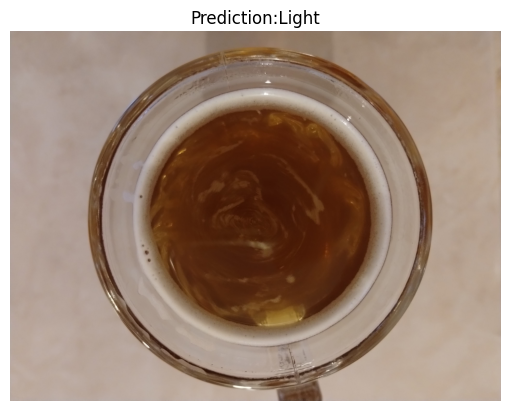

In [52]:

class_index = np.argmax(prediction, axis=1)
print(class_index)
img = Image.open(img)
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction:{classes[class_index[0]]}")
plt.show()

In [53]:
for i, prob in enumerate(prediction[0]):
    print(f"{classes[i]}: {prob:.2%}")


Light: 34.18%
Medium: 32.52%
Strong: 33.30%
